# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data=pd.merge(study_results,mouse_metadata,how="inner",on="Mouse ID")
# Display the data table for preview
data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
data["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_bool=data.duplicated(["Mouse ID", "Timepoint"], keep=False)
duplicates=data.loc[duplicates_bool]
dupvalues=duplicates["Mouse ID"].unique()
dupvalues

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
droplines=data.loc[data["Mouse ID"].isin(dupvalues)]
droplines

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_clean=data.drop(index=droplines.index)
data_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
data_clean["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
gb=data_clean.groupby("Drug Regimen")
summary=pd.DataFrame({
                    "Mean Tumor Volume":gb["Tumor Volume (mm3)"].mean(),
                    "Median Tumor Volume":gb["Tumor Volume (mm3)"].median(),
                    "Tumor Volume Variance":gb["Tumor Volume (mm3)"].var(),
                    "Tumor Volume Std. Dev.":gb["Tumor Volume (mm3)"].std(),
                    "Tumor Volume Std. Err.":gb["Tumor Volume (mm3)"].sem()
                    })

summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_2=gb["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])

summary_2.columns.name="Tumor Volume (mm3)"

summary_2

Tumor Volume (mm3),mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

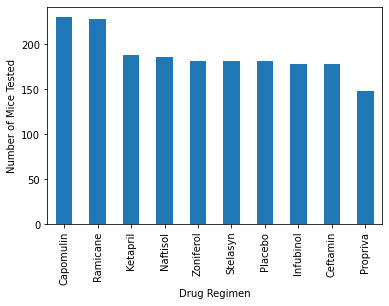

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
count=gb.count()["Timepoint"].sort_values(ascending=False)
figure=count.plot(kind="bar")
figure.set_ylabel("Number of Mice Tested")
plt.show()

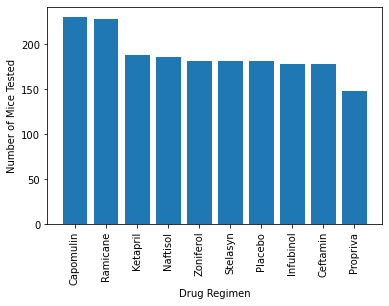

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
count=gb.count()["Timepoint"].sort_values(ascending=False)
xaxis=np.arange(len(count))
plt.bar(xaxis,count)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(xaxis,count.index,rotation=90)
plt.show()

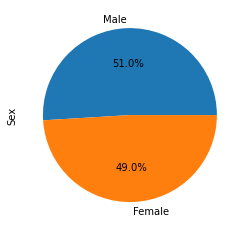

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex=data_clean["Sex"].value_counts()
figure2=sex.plot(kind="pie",autopct='%.1f%%')
plt.show()

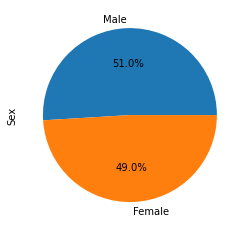

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex=data_clean["Sex"].value_counts()
figure3=plt.pie(sex,labels=sex.index,autopct='%.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints=data_clean.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

data_last=pd.merge(last_timepoints,data_clean,how="left",on=["Mouse ID","Timepoint"])
data_last

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumordata=[]
for treatment in treatments:
    treatment_data=data_last.loc[data_last["Drug Regimen"]==treatment]["Tumor Volume (mm3)"]
    tumordata.append(treatment_data)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles=treatment_data.quantile([0.25,0.75])
    IQR=quartiles[0.75]-quartiles[0.25]
 # Determine outliers using upper and lower bounds
    lower_bound=quartiles[0.25]-(1.5*IQR)
    upper_bound=quartiles[0.75]+(1.5*IQR)
    outliers=[round(mouse,6) for mouse in treatment_data if mouse > upper_bound or mouse < lower_bound]
    print(f"{treatment} potential outliers: {outliers}")

Capomulin potential outliers: []
Ramicane potential outliers: []
Infubinol potential outliers: [36.321346]
Ceftamin potential outliers: []


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumordata=[]
for treatment in treatments:
    treatment_data=data_last.loc[data_last["Drug Regimen"]==treatment]["Tumor Volume (mm3)"]
    tumordata.append(treatment_data)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles=treatment_data.quantile([0.25,0.75])
    IQR=quartiles[0.75]-quartiles[0.25]
 # Determine outliers using upper and lower bounds
    lower_bound=quartiles[0.25]-(1.5*IQR)
    upper_bound=quartiles[0.75]+(1.5*IQR)
    outliers=treatment_data.loc[(treatment_data>upper_bound)|(treatment_data<lower_bound)]
    print(f"{treatment} potential outliers: {outliers}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


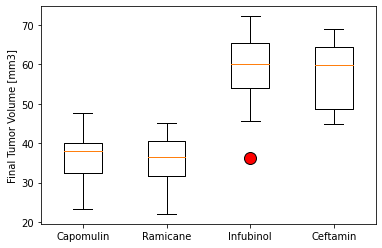

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumordata,labels=treatments,flierprops={"marker":'o', "markerfacecolor":'red', "markersize":12})
plt.ylabel("Final Tumor Volume [mm3]")
plt.show()

## Line and Scatter Plots

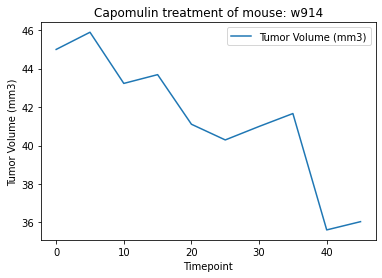

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mice=data_clean.loc[data_clean["Drug Regimen"]=="Capomulin"]["Mouse ID"].unique()
capomulin_mouse=random.choice(capomulin_mice)
mouse_lookup=data_clean.loc[data_clean["Mouse ID"]==capomulin_mouse]
figure_line=mouse_lookup.plot(kind="line",x="Timepoint",y="Tumor Volume (mm3)",title=f"Capomulin treatment of mouse: {capomulin_mouse}")
figure_line.set_ylabel("Tumor Volume (mm3)")
plt.show()

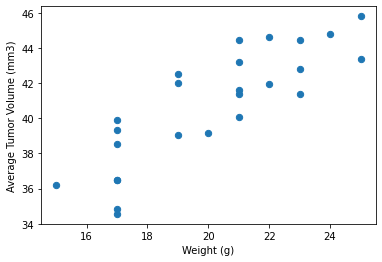

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_volume=data_clean[data_clean["Drug Regimen"]=="Capomulin"].groupby("Mouse ID").mean()["Tumor Volume (mm3)"]
scatter_data=pd.merge(average_volume,mouse_metadata[["Mouse ID","Weight (g)"]],how="inner",on="Mouse ID")
scatter_figure=scatter_data.plot("Weight (g)","Tumor Volume (mm3)",kind="scatter", s=40)
scatter_figure.set_ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


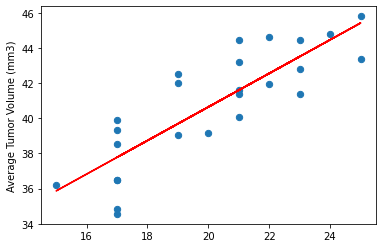

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
plt.scatter(scatter_data["Weight (g)"],scatter_data["Tumor Volume (mm3)"], s=40)
plt.ylabel("Average Tumor Volume (mm3)")

[slope,intersection,rvalue,pvalue,stderr]=st.linregress(x=scatter_data["Weight (g)"],y=scatter_data["Tumor Volume (mm3)"])
regression_data=slope*scatter_data["Weight (g)"]+intersection
plt.plot(scatter_data["Weight (g)"],regression_data, c="r")

print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}")
plt.show()